# Lab 3: Training Tokenizers

![](../figs/deep_nlp/lab/tokenize.png)


## Prepare the environment


```python
%pip install --pre ekorpkit[tokenize]
```

In [39]:
%config InlineBackend.figure_format='retina'
%load_ext autotime
%load_ext autoreload
%autoreload 2

from ekorpkit import eKonf

eKonf.setLogger("INFO")
print("version:", eKonf.__version__)

is_colab = eKonf.is_colab()
print("is colab?", is_colab)
if is_colab:
    eKonf.mount_google_drive()
workspace_dir = "/content/drive/MyDrive/workspace"
project_name = "ekorpkit-book"
project_dir = eKonf.set_workspace(workspace=workspace_dir, project=project_name)
print("project_dir:", project_dir)

INFO:ekorpkit.utils.notebook:Google Colab not detected.
INFO:ekorpkit.base:Setting EKORPKIT_WORKSPACE_ROOT to /content/drive/MyDrive/workspace
INFO:ekorpkit.base:Setting EKORPKIT_PROJECT to ekorpkit-book
INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
version: 0.1.40.post0.dev21
is colab? False
project_dir: /content/drive/MyDrive/workspace/projects/ekorpkit-book
time: 41.5 ms (started: 2022-11-17 09:47:31 +00:00)


### Load the saved corpora


In [20]:
data = eKonf.load_data("enko_filtered.parquet", project_dir + "/data")
data.head()


INFO:ekorpkit.io.file:Processing [1] files from ['enko_filtered.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/content/drive/MyDrive/workspace/projects/ekorpkit-book/data/enko_filtered.parquet']
INFO:ekorpkit.io.file:Loading data from /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/enko_filtered.parquet


,id,text,split,filename,corpus,num_chars,num_words,num_sents,avg_num_chars,avg_num_words
1,7644961,Anaissini is a tribe of click beetles in the f...,train,wiki_49,enwiki_sampled,63,11,1,5.727273,11.000000
2,6658552,The Vicky Metcalf Award for Literature for You...,train,wiki_24,enwiki_sampled,479,82,5,5.841463,16.400000
4,11081255,Eylex Films Pvt is a chain of multiplex and si...,train,wiki_94,enwiki_sampled,1161,181,12,6.414365,15.083333
8,4706486,Željko Zečević (; born 21 October 1963) is a S...,train,wiki_02,enwiki_sampled,1151,201,15,5.726368,13.400000
12,2170359,Gilberto Nascimento Silva (born 9 June 1956) i...,train,wiki_57,enwiki_sampled,685,105,9,6.523810,11.666667


time: 3.05 s (started: 2022-11-15 06:55:39 +00:00)


### Covert pandas datafame to huggingface dataset


In [21]:
from datasets import Dataset

text_column = "text"
data = data[data.corpus == "kowiki"]
raw_dataset = Dataset.from_pandas(data[[text_column]])
raw_dataset


Dataset({
    features: ['text', '__index_level_0__'],
    num_rows: 412646
})

time: 859 ms (started: 2022-11-15 06:55:51 +00:00)


### Shuffle the dataset


In [22]:
# shuffle the dataset

raw_dataset = raw_dataset.shuffle(seed=42)


time: 93.7 ms (started: 2022-11-15 06:55:54 +00:00)


### Split the dataset into sentences for training

The sentencepiece module comes with a python training API, which uses sentences in a file, one sentence per line. We will use the `sent_tokenize` function from the `nltk` package to split the text into sentences. The `sent_tokenize` function is a wrapper around the `punkt` tokenizer, which is a pre-trained sentence tokenizer. The `punkt` tokenizer is trained on the Penn Treebank corpus, which is a collection of Wall Street Journal articles. The `punkt` tokenizer is a good choice for plain English text, but it may not be the best choice for other languages.


In [23]:
import nltk
from nltk.tokenize import sent_tokenize
from ekorpkit.tokenizers.trainers.spm import export_sentence_chunk_files

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

time: 22.3 ms (started: 2022-11-15 06:55:56 +00:00)


In [24]:
output_dir = project_dir + "/data/tokenizers/ko_filtered_chunk"

export_sentence_chunk_files(
    raw_dataset,
    output_dir=output_dir,
    chunk_size=10000,
    text_column=text_column,
    sent_tokenize=sent_tokenize,
)


INFO:ekorpkit.tokenizers.trainers.spm:Writing sentence chunks to /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/tokenizers/ko_filtered_chunk


  0%|          | 0/42 [00:00<?, ?it/s]

sent_chunk_0000.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0001.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0002.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0003.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0004.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0005.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0006.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0007.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0008.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0009.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0010.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0011.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0012.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0013.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0014.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0015.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0016.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0017.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0018.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0019.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0020.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0021.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0022.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0023.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0024.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0025.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0026.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0027.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0028.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0029.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0030.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0031.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0032.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0033.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0034.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0035.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0036.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0037.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0038.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0039.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0040.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0041.txt:   0%|          | 0/2646 [00:00<?, ?it/s]

time: 1min 1s (started: 2022-11-15 06:55:57 +00:00)


### Sample sentences and combine them into a single file

If your dataset is too large, you can sample a subset of the sentence files for training. The `sample` function from the `random` module can be used to sample a subset of the files.

You can use `sample_and_combine` function to sample a subset of sentence files and combine them into a single file.


In [25]:
from ekorpkit.tokenizers.trainers.spm import sample_and_combine

input_dir = project_dir + "/data/tokenizers/ko_filtered_chunk"
output_dir = project_dir + "/data/tokenizers/ko_filtered_samples_small"

sampled_file = sample_and_combine(
    input_dir=input_dir, output_dir=output_dir, sample_size=3
)

INFO:ekorpkit.tokenizers.trainers.spm:sampled files: ['sent_chunk_0024.txt', 'sent_chunk_0016.txt', 'sent_chunk_0019.txt']
INFO:ekorpkit.tokenizers.trainers.spm:number of lines sampled: 180,857


  0%|          | 0/180857 [00:00<?, ?it/s]

INFO:ekorpkit.tokenizers.trainers.spm:saved sampled sentences to /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/tokenizers/ko_filtered_samples_small/sampled_sentences.txt


time: 1.32 s (started: 2022-11-15 06:57:15 +00:00)


INFO:ekorpkit.utils.notebook:Google Colab not detected.
INFO:ekorpkit.base:Setting EKORPKIT_WORKSPACE_ROOT to /content/drive/MyDrive/workspace
INFO:ekorpkit.base:Setting EKORPKIT_PROJECT to ekorpkit-book
INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env


version: 0.1.40.post0.dev20
is colab? False
project_dir: /content/drive/MyDrive/workspace/projects/ekorpkit-book
time: 1.34 s (started: 2022-11-15 07:03:27 +00:00)


## Train a BranchingEntropyTokenizer

In [41]:
from ekorpkit.tokenizers.branching import BranchingEntropyTokenizer

bet = BranchingEntropyTokenizer()

sampled_file = "data/tokenizers/ko_filtered_samples_small/*.txt"
# sampled_file = "data/tokenizers/ko_filtered_chunk/*.txt"
sampled_file = project_dir + "/" + sampled_file
bet.train(sampled_file, min_frequency=5, verbose=True)
bet.save(project_dir + "/tokenizers", "branching_small")

INFO:ekorpkit.io.file:Processing [1] files from ['/content/drive/MyDrive/workspace/projects/ekorpkit-book/data/tokenizers/ko_filtered_samples_small/*.txt']


  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Total words: 419035
Top 10 words: [('▁', 2068205), ('.', 180891), ('1', 115153), (',', 111800), ('2', 79171), ('0', 78951), (')', 68137), ('(', 68121), ('9', 55595), ('년', 52303)]
Total words after filtering: 419035


  0%|          | 0/419035 [00:00<?, ?it/s]

Total subwords: 420804
Top 10 subwords: [('▁', 6081592), ('이', 193907), ('▁.', 180891), ('▁.▁', 180891), ('.', 180891), ('.▁', 180891), ('다', 178711), ('다▁', 154818), ('에', 137751), ('의', 131922)]


Building tries:   0%|          | 0/420804 [00:00<?, ?it/s]

['/content/drive/MyDrive/workspace/projects/ekorpkit-book/tokenizers/branching_small/vocab.json.zst',
 '/content/drive/MyDrive/workspace/projects/ekorpkit-book/tokenizers/branching_small/config.json']

time: 22.7 s (started: 2022-11-17 09:48:30 +00:00)


In [1]:
%config InlineBackend.figure_format='retina'
%load_ext autotime
%load_ext autoreload
%autoreload 2

from ekorpkit import eKonf

eKonf.setLogger("INFO")
print("version:", eKonf.__version__)

is_colab = eKonf.is_colab()
print("is colab?", is_colab)
if is_colab:
    eKonf.mount_google_drive()
workspace_dir = "/content/drive/MyDrive/workspace"
project_name = "ekorpkit-book"
project_dir = eKonf.set_workspace(workspace=workspace_dir, project=project_name)
print("project_dir:", project_dir)

INFO:ekorpkit.utils.notebook:Google Colab not detected.
INFO:ekorpkit.base:Setting EKORPKIT_WORKSPACE_ROOT to /content/drive/MyDrive/workspace
INFO:ekorpkit.base:Setting EKORPKIT_PROJECT to ekorpkit-book
INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env


version: 0.1.40.post0.dev21
is colab? False
project_dir: /content/drive/MyDrive/workspace/projects/ekorpkit-book
time: 1.42 s (started: 2022-11-17 11:36:30 +00:00)


In [10]:
from ekorpkit.tokenizers.branching import BranchingEntropyTokenizer

bet = BranchingEntropyTokenizer.load(
    project_dir + "/tokenizers", "branching_large", 
)

sampled_file = "data/tokenizers/ko_filtered_samples_small/*.txt"
sampled_file = project_dir + "/" + sampled_file

sentences = []
files = eKonf.get_filepaths(sampled_file)
for file in files:
    with open(file, "r") as f:
        sentences.extend(f.readlines())

print("number of sentences:", len(sentences))
print(sentences[100])

Building tries:   0%|          | 0/20398986 [00:00<?, ?it/s]

INFO:ekorpkit.io.file:Processing [1] files from ['/content/drive/MyDrive/workspace/projects/ekorpkit-book/data/tokenizers/ko_filtered_samples_small/*.txt']


number of sentences: 180857
포지션은 골키퍼이다.

time: 1min 54s (started: 2022-11-17 11:37:37 +00:00)


In [19]:
import random

# random.seed(42)

for i in range(5):
    text = random.choice(sentences).strip()
    print(text)
    print(bet.tokenize(text, branching_threshold=0.1, cohesion_threshold=-0.00))
    print("-" * 80)
    

운행 정보.
['▁운행', '▁정보', '.']
--------------------------------------------------------------------------------
그리고 당시 숙박료는 일본식 호텔의 2배 이상이었으며, 당시 한양으로 가기 위해 배에서 인천항으로 내린 서양인들을 상대로 운영했다.
['▁그리고', '▁당시', '▁숙박', '료는', '▁일본', '식', '▁호텔의', '▁2', '배', '▁이상이', '었으며', ',', '▁당시', '▁한양으로', '▁가기', '▁위해', '▁배에서', '▁인천항으로', '▁내린', '▁서양인들을', '▁상대로', '▁운영', '했다', '.']
--------------------------------------------------------------------------------
섬식 1면 2선 구조의 지상역으로, 선상역사를 운영하고 있다.
['▁섬식', '▁1', '면', '▁2', '선', '▁구조의', '▁지상역', '으로', ',', '▁선상역사를', '▁운영하고', '▁있다', '.']
--------------------------------------------------------------------------------
그녀는 말년 로마에서 아들과 같이 보냈다.
['▁그녀는', '▁말년', '▁로마에서', '▁아들', '과', '▁같이', '▁보냈다', '.']
--------------------------------------------------------------------------------
2012년 우크라이나 총선에서는 2개 선거구에서 경쟁했다.
['▁2', '0', '1', '2', '년', '▁우크라이나', '▁총선에서', '는', '▁2', '개', '▁선거구에서', '▁경쟁했다', '.']
--------------------------------------------------------------------------------


In [12]:
print(bet._tokenizer.fwd_trie.get_leafs("소속된"))
print(bet._tokenizer.fwd_trie.get_children("소속된"))

[856, 18, 2]
{'<END>': 876, '▁': {'<END>': 856}, '다': {'<END>': 20, '▁': {'<END>': 18}, '는': {'<END>': 2, '▁': {'<END>': 2}}}}
time: 18.2 ms (started: 2022-11-17 11:40:28 +00:00)


In [17]:
bet._tokenizer.fwd_trie.get_children("추정하")

{'<END>': 774,
 '기': {'<END>': 54,
  '도': {'<END>': 38, '▁': {'<END>': 38}},
  '가': {'<END>': 2, '▁': {'<END>': 2}},
  '▁': {'<END>': 13},
  '에': {'<END>': 1, '는': {'<END>': 1, '▁': {'<END>': 1}}}},
 '는': {'<END>': 118,
  '▁': {'<END>': 98},
  '데': {'<END>': 20,
   '▁': {'<END>': 18},
   '에': {'<END>': 2, '▁': {'<END>': 2}}}},
 '고': {'<END>': 499,
  '▁': {'<END>': 497},
  '자': {'<END>': 1, '▁': {'<END>': 1}},
  '있': {'<END>': 1, '다': {'<END>': 1, '▁': {'<END>': 1}}}},
 '였': {'<END>': 36,
  '다': {'<END>': 27, '▁': {'<END>': 27}},
  '으': {'<END>': 4, '나': {'<END>': 4, '▁': {'<END>': 4}}},
  '을': {'<END>': 1, '▁': {'<END>': 1}},
  '고': {'<END>': 1, '▁': {'<END>': 1}},
  '던': {'<END>': 1, '▁': {'<END>': 1}},
  '었': {'<END>': 1, '다': {'<END>': 1, '▁': {'<END>': 1}}},
  '음': {'<END>': 1, '에': {'<END>': 1, '도': {'<END>': 1, '▁': {'<END>': 1}}}}},
 '며': {'<END>': 22, '▁': {'<END>': 22}},
 '여': {'<END>': 14, '▁': {'<END>': 14}},
 '지': {'<END>': 8,
  '는': {'<END>': 1, '▁': {'<END>': 1}},
  '만': 

time: 18.2 ms (started: 2022-11-17 11:41:05 +00:00)


['▁출간되었다']


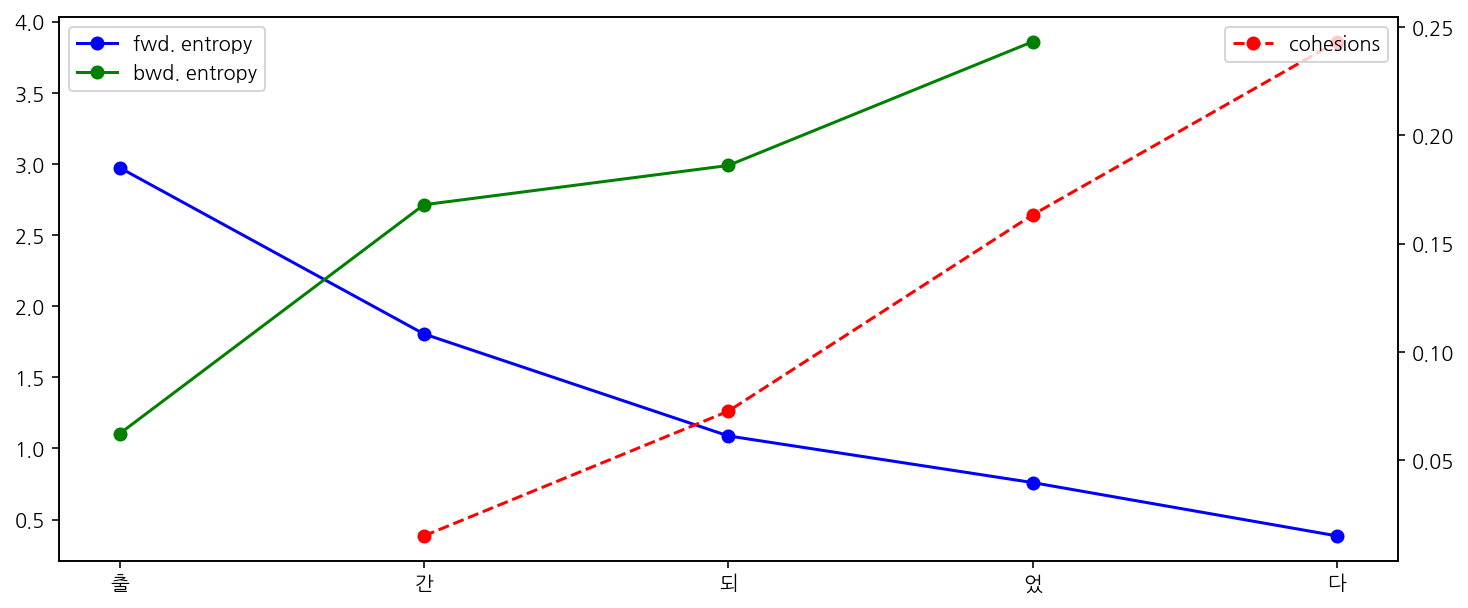

,char,L_entropy,L_cohesion,L_freq,L_word,D_f_ent,D_b_ent,D_coh,R_entropy,R_cohesion,R_freq,R_word
0,▁,NaN,NaN,NaN,▁,0.000000,-0.683077,0.000000,0.420303,0.120858,519.0,출간되었다▁
1,출,2.974124,NaN,103856.0,▁출,0.000000,-1.609846,0.000000,1.103380,0.074210,983.0,간되었다▁
2,간,1.805129,0.015028,2222.0,▁출간,-1.168995,-0.276016,0.057590,2.713226,0.277120,181981.0,되었다▁
3,되,1.088228,0.072618,775.0,▁출간되,-0.716901,-0.870059,0.090687,2.989242,0.109931,257850.0,었다▁
4,었,0.760188,0.163306,639.0,▁출간되었,-0.328040,0.000000,0.079984,3.859301,NaN,2135822.0,다▁
5,다,0.385317,0.243289,511.0,▁출간되었다,-0.374871,0.000000,0.000000,NaN,NaN,NaN,▁


time: 3.86 s (started: 2022-11-17 11:42:17 +00:00)


In [18]:
word = "출간되었다"
if word[0] != "▁":
    word = "▁" + word
print(bet.tokenize(word, branching_threshold=0.1))
bet.plot_local_entropy(word)
results = bet.show_local_entropy(word)
results

In [16]:
from tqdm.auto import tqdm

tokenized_sentences = []
for text in tqdm(sentences):
    text = text.strip()
    tokens = bet.tokenize(text, branching_threshold=0.00, cohesion_threshold=-0.00)
    tokenized_sentences.append(tokens)

  0%|          | 0/180857 [00:00<?, ?it/s]

time: 1h 38min 47s (started: 2022-11-16 08:29:47 +00:00)


In [24]:
print(random.choice(tokenized_sentences))

['▁클리블랜드', '▁배런스', '(', 'cle', 've', 'land', '▁ba', 'r', 'on', 's', ')', '는', '▁1', '9', '7', '6', '년부터', '▁1', '9', '7', '8', '년까지', '▁오하이오주', '▁리치필드', '를', '▁연고', '지로', '▁하는', '▁nhl', '▁프린스', '▁오브', '▁웨일즈', '▁콘퍼런스', '▁애덤스', '▁디비전', '▁소속', '에', '▁속한다', '.']
time: 14.6 ms (started: 2022-11-16 10:20:54 +00:00)


In [30]:
from collections import Counter

# words_ko = sum(tokenized_sentences, [])
# counter_ko = Counter(words_ko)

# top 10 words in english corpus

counter_ko.most_common(100)

[('.', 180698),
 (',', 110808),
 ('0', 78232),
 ('▁1', 71063),
 ('(', 63129),
 (')', 61023),
 ('년', 52238),
 ('9', 50393),
 ('▁2', 48649),
 ('의', 47368),
 ('는', 46112),
 ('1', 44090),
 ('이다', 35140),
 ('에서', 34319),
 ('으로', 33458),
 ('2', 30522),
 ('에', 26561),
 ('월', 25741),
 ('8', 24278),
 ('은', 22698),
 ('5', 20802),
 ('7', 19981),
 ('6', 19884),
 ('를', 19000),
 ('4', 18885),
 ('을', 18415),
 ('3', 18403),
 ('▁있다', 18126),
 ('가', 17138),
 ('일', 16992),
 ('이', 16697),
 ('하', 16568),
 ('로', 15674),
 ('▁3', 13035),
 ('고', 13012),
 ('했다', 11396),
 ('와', 10580),
 ('다', 9930),
 ('▁4', 9197),
 ('하였다', 9030),
 ('과', 8735),
 ('▁이', 8649),
 ('▁5', 8061),
 ('》', 7931),
 ('"', 7842),
 ('하는', 7831),
 ('-', 7792),
 ('▁~', 7748),
 ('▁《', 7708),
 ('▁있는', 7626),
 ('되었다', 7527),
 ('▁)', 7114),
 ('인', 6885),
 ('되었', 6675),
 ('한다', 6528),
 ('하고', 6445),
 ('▁6', 6397),
 ('도', 6171),
 ('▁제', 6105),
 ('▁7', 6072),
 ('으며', 6052),
 ('년에', 5821),
 ('▁8', 5772),
 ('▁수', 5602),
 ('하여', 5420),
 ('▁대한민국', 5343),


time: 61.5 ms (started: 2022-11-17 09:23:33 +00:00)
